In [33]:
import pickle
import torch

dpr_emb = pickle.load(open('../embeddings/nq_dev__dpr.p', 'rb'))
gtr_emb = pickle.load(open('../embeddings/nq_dev__gtr_base.p', 'rb'))

In [34]:
import struct
import numpy as np

def binary(num: float) -> np.ndarray:
    # adapted from https://stackoverflow.com/a/16444778
    binary_str = ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))
    return np.array([int(c) for c in binary_str])

binary(dpr_emb[0][0].item())

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [35]:
from tqdm.notebook import trange

def emb_to_binary(emb: np.ndarray) -> np.ndarray:
    out_arr = np.zeros((emb.shape[0], emb.shape[1], 32))
    out_arr.shape
    for i in trange(emb.shape[0]):
        for d in range(emb.shape[1]):
            out_arr[i, d] = binary(emb[i,d].item())
    return out_arr


dpr_emb_binary = emb_to_binary(dpr_emb)
gtr_emb_binary = emb_to_binary(gtr_emb)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

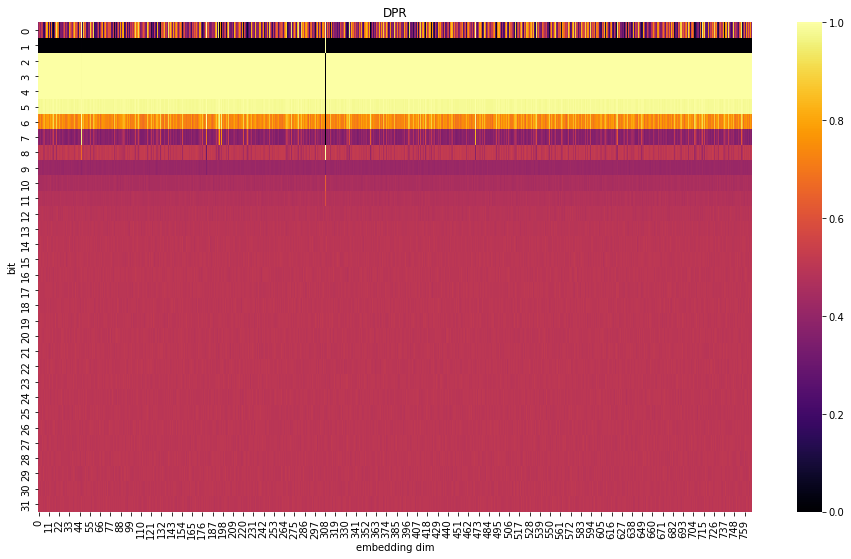

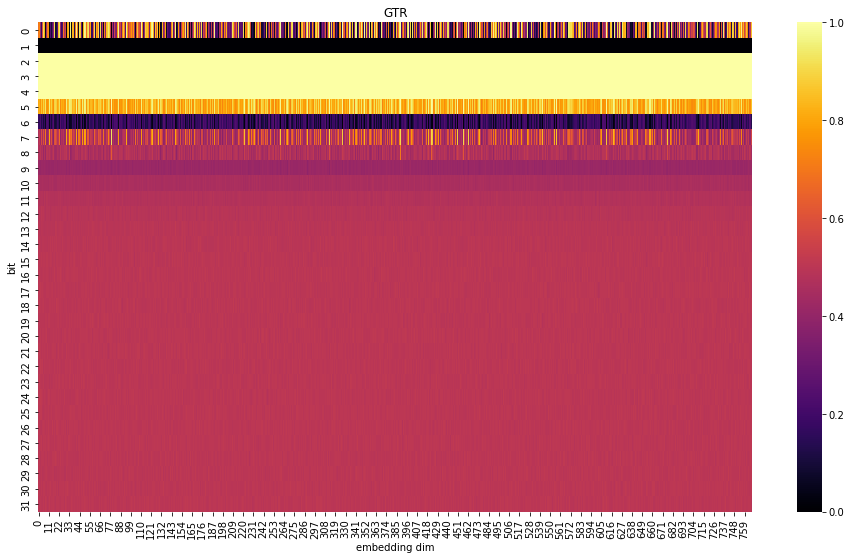

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_heatmap(data: np.ndarray, title: str):
    plt.figure(figsize=(16,9))
    avg_data = data.mean(axis=0) # average over dataset
    ax = sns.heatmap(avg_data.T, cmap='inferno')
    ax.set_title(title)
    ax.set_ylabel('bit')
    ax.set_xlabel('embedding dim')
    plt.show()

plot_heatmap(dpr_emb_binary, 'DPR')
plot_heatmap(gtr_emb_binary, 'GTR')

In [43]:
gtr_emb[0].norm(p=2)

tensor(1.0000)